<a href="https://colab.research.google.com/github/qjy9ey/qjy9ey/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [4]:
import sqlite3

# Creates database.
connection = sqlite3.connect('superhero_db.sqlite')

print("Database created and connected!")

cursor = connection.cursor()

print("Cursor created!")

# Creates heroes table.
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT NOT NULL
)
''')

print("Heroes table created!")

# Creates villains table.
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
)
''')

print("Villains table created!")

# Creates battles table.
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villian_id INTEGER,
    outcome TEXT NOT NULL
)
''')

print("Battles table created!")

Database created and connected!
Cursor created!
Heroes table created!
Villains table created!
Battles table created!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [5]:
import pandas as pd

# Reads the data fom the heroes.csv file.
df_heroes = pd.read_csv('heroes.csv')

print(df_heroes.head())

# Puts data into heroes database.
df_heroes.to_sql('heroes', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the heroes table.")

cursor.execute("SELECT * FROM heroes")
rows = cursor.fetchall()

print("Heroes data:")
for row in rows:
    print(row)

# Reads data from the villains.csv file.
df_villains = pd.read_csv('villains.csv')

df_villains.to_sql('villains', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the villains table.")

cursor.execute("SELECT * FROM villains")
rows = cursor.fetchall()

print("Villains data:")
for row in rows:
    print(row)

# Reads data from the battles.csv file.
df_battles = pd.read_csv('battles.csv')

df_battles.to_sql('battles', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the battles table.")

cursor.execute("SELECT * FROM battles")
rows = cursor.fetchall()

print("Battles data:")
for row in rows:
    print(row)

   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
Data from CSV has been inserted into the heroes table.
Heroes data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')
Data from CSV has been inserted into the villains table.
Villains data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [11]:
print("1. Retrieve all superheroes and their powers")

# Retrieves the superhero name and power from the heroes database.
cursor.execute("SELECT name, power FROM heroes")
results = cursor.fetchall()
for row in results:
    print(row)

print("2. Find all battles where the hero won")
cursor.execute("SELECT id, outcome FROM battles WHERE outcome = 'Hero Wins'")

# Only pulls the id when the outcome is 'Hero Wins.'
results = cursor.fetchall()
for row in results:
    print(row)

print("3. List all villains and their evil plans")
cursor.execute("SELECT name, evil_plan FROM villains")

# Retrieves name and evil plans from villains database.
results = cursor.fetchall()
for row in results:
   print(row)

print("4. Determine which superhero has fought the most battles")

# Determines which superhero fought the most battles by counting the id.
cursor.execute("""
    SELECT heroes.name, COUNT(battles.hero_id) AS battle_count
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    GROUP BY battles.hero_id
    ORDER BY battle_count DESC
    LIMIT 1
""")

result = cursor.fetchone()
if result:
    print(f"Superhero with the most battles: {result[0]}, Battles fought: {result[1]}")
else:
    print("No battles found in the database.")

1. Retrieve all superheroes and their powers
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')
2. Find all battles where the hero won
(2, 'Hero Wins')
(5, 'Hero Wins')
(7, 'Hero Wins')
(8, 'Hero Wins')
(9, 'Hero Wins')
(13, 'Hero Wins')
(20, 'Hero Wins')
(29, 'Hero Wins')
(30, 'Hero Wins')
3. List all villains and their evil plans
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')
4. Determine which superhero has foug

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [12]:
# Create the sidekicks table that includes name of sidekick, which superhero they are the sidekick of, and their powers.
connection.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    hero_id INTEGER NOT NULL,
    power TEXT,
    FOREIGN KEY(hero_id) REFERENCES heroes(id)
)
''')
print("Sidekicks table created!")

# Insert sample data into the sidekicks table.
sidekick_data = [
    ('Ned', 1, 'Tech Support'),  # Spiderman has ID 3
    ('War Machine', 2, 'Armored Suit'),  # Iron Man has ID 2
    ('Robin', 3, 'Martial Arts'),  # Batman has ID 3
    ('Jimmy Olsen', 4, 'Friend'),
    ('Miek', 5, 'N/A'),
    ('Cassie Sandsmark', 6, 'Wonder Girl'),
    ('Shuri', 7, 'Gadgets'),
    ('Wally West', 8, 'KidFlash'),
    ('Rick Jones', 9, 'A-bomb'),
    ('Wong', 10, 'Sorceror')

]

# Insert the data into the database.
cursor.executemany('''
INSERT INTO sidekicks (name, hero_id, power)
VALUES (?, ?, ?)
''', sidekick_data)

connection.commit()
print("Sample sidekicks inserted!")

#Query: Find all superheroes along with their sidekicks and their powers.
query_hero_sidekicks = '''
SELECT heroes.name AS hero_name, sidekicks.name AS sidekick_name, sidekicks.power AS sidekick_power
FROM sidekicks
JOIN heroes ON sidekicks.hero_id = heroes.id
ORDER BY heroes.name;
'''

df_hero_sidekicks = pd.read_sql_query(query_hero_sidekicks, connection)
print("Superheroes and Their Sidekicks:")
print(df_hero_sidekicks)

Sidekicks table created!
Sample sidekicks inserted!
Superheroes and Their Sidekicks:
        hero_name     sidekick_name sidekick_power
0          Batman             Robin   Martial Arts
1   Black Panther             Shuri        Gadgets
2  Doctor Strange              Wong       Sorceror
3            Hulk        Rick Jones         A-bomb
4        Iron Man       War Machine   Armored Suit
5      Spider-Man               Ned   Tech Support
6        Superman       Jimmy Olsen         Friend
7       The Flash        Wally West       KidFlash
8            Thor              Miek            N/A
9    Wonder Woman  Cassie Sandsmark    Wonder Girl


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

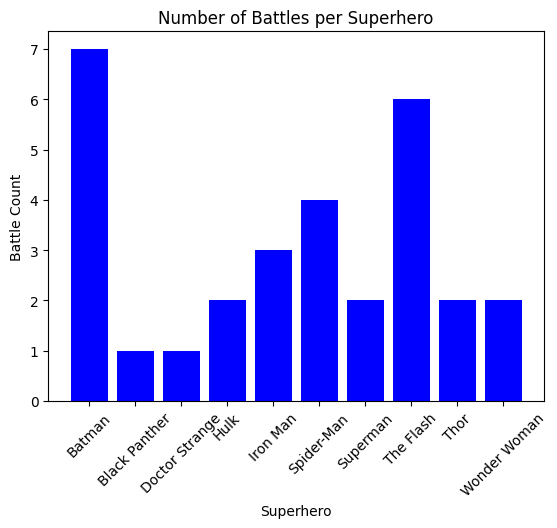

In [13]:
import pandas as pd
# Import matplotlib to create a bar chart.
import matplotlib.pyplot as plt

# Query to count the number of battles per superhero.
query_battles_count = '''
SELECT heroes.name AS hero_name, COUNT(battles.id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
'''

# Load query results into a dataframe.
df_battles_count = pd.read_sql_query(query_battles_count, connection)

# Plot the bar chart.
plt.bar(df_battles_count['hero_name'], df_battles_count['battle_count'], color='blue')
plt.title('Number of Battles per Superhero')
plt.xlabel('Superhero')
plt.ylabel('Battle Count')
plt.xticks(rotation=45)
plt.show()

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!